In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
read_file=pd.read_csv('housing.data',sep="\s+",names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATO','B:1000','CSTATE','MEDV'])

In [35]:
read_file.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATO,B:1000,CSTATE,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [36]:
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM      506 non-null float64
ZN        506 non-null float64
INDUS     506 non-null float64
CHAS      506 non-null int64
NOX       506 non-null float64
RM        506 non-null float64
AGE       506 non-null float64
DIS       506 non-null float64
RAD       506 non-null int64
TAX       506 non-null float64
PTRATO    506 non-null float64
B:1000    506 non-null float64
CSTATE    506 non-null float64
MEDV      506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


# Feature Engineering

In [37]:
read_file.isna().sum()

CRIM      0
ZN        0
INDUS     0
CHAS      0
NOX       0
RM        0
AGE       0
DIS       0
RAD       0
TAX       0
PTRATO    0
B:1000    0
CSTATE    0
MEDV      0
dtype: int64

# Feature Selection

In [38]:
read_file.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATO', 'B:1000', 'CSTATE', 'MEDV'],
      dtype='object')

In [65]:
X=read_file.drop('MEDV',axis=1)
y=read_file['MEDV']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATO,B:1000,CSTATE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [40]:
import seaborn as sns

In [41]:
# finding correletion between features
corr=X.corr()
corr.shape

(13, 13)

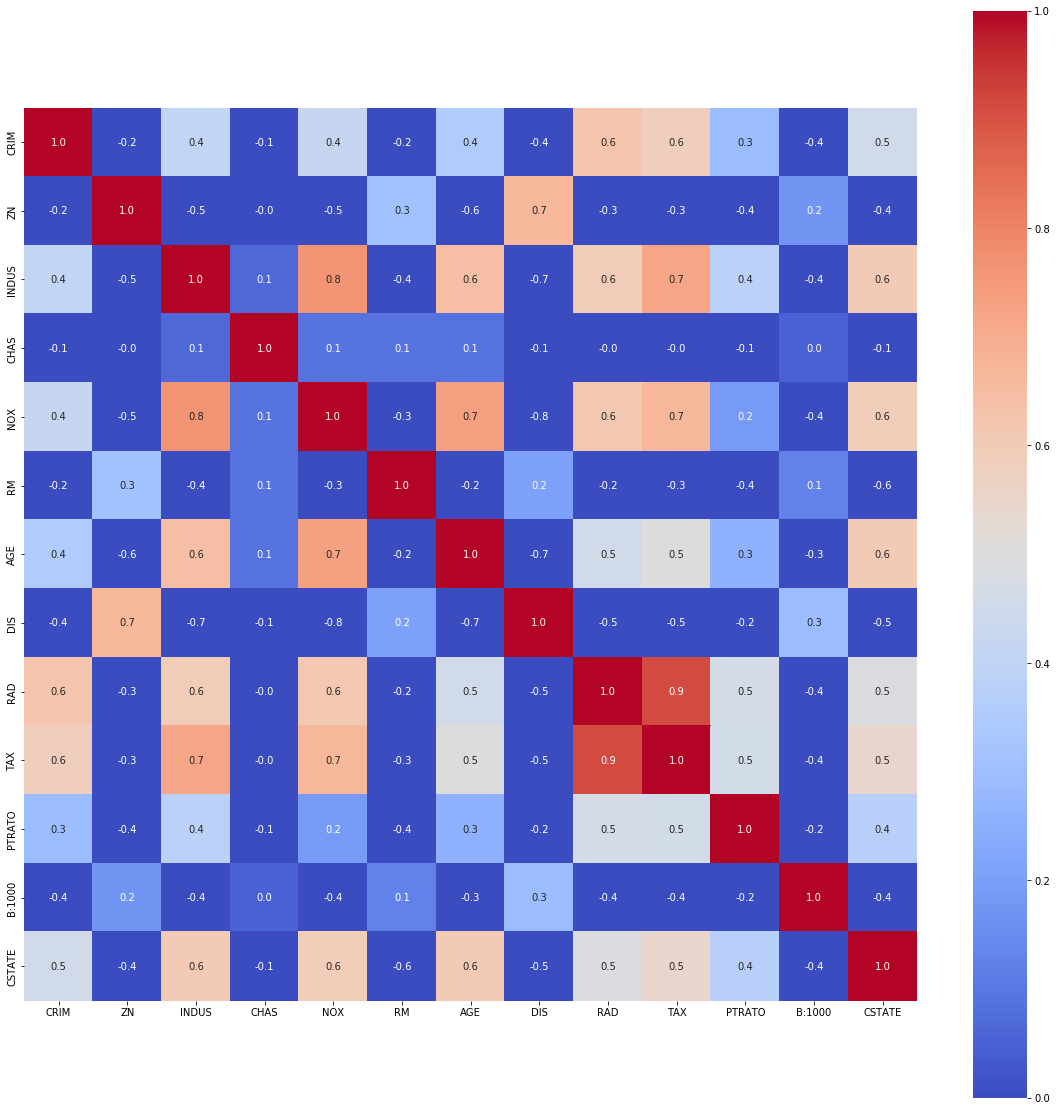

In [66]:
#Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmin=0,vmax=1,annot= True, fmt= ".1f",cmap='coolwarm',cbar= True, square= True)
plt.show()

In [43]:
#with the following function we can find highly correleated features
def correlation(dataset,threshold):
    col_corr=set() #set all the names of corelated features
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features=correlation(X,.7)
len(set(corr_features))

3

In [45]:
corr_features

{'AGE', 'NOX', 'TAX'}

In [46]:
X_new=X.drop(corr_features,axis=1)
X_new

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATO,B:1000,CSTATE
0,0.00632,18.0,2.31,0,6.575,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,6.421,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,7.185,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,6.998,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,7.147,6.0622,3,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,6.430,6.0622,3,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,6.012,5.5605,5,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,6.172,5.9505,5,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,5.631,6.0821,5,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,6.004,6.5921,5,15.2,386.71,17.10


In [47]:
a=[1,2,3,4,3,5]
b=set(a)
print(b)

{1, 2, 3, 4, 5}


In [48]:
c=set()
c.add(1)
c.add(2)
c.add(1)
print(c)

{1, 2}


# split into train and test 

In [49]:
from sklearn.model_selection import train_test_split
X_new_train,X_new_test,y_train,y_test=train_test_split(X_new,y,test_size=.30,random_state=1)

In [50]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_new_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
#Model prediction on training data
y_pred=lm.predict(X_new_train)


In [52]:
#Model Evaluatio
import sklearn.metrics as metrics
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

MAE: 3.473917288818625
MSE: 25.53294375749556
RMSE: 5.05301333438727


# without splitting training and test data

In [53]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_new,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
y_pred=lm.predict(X_new)

In [55]:
#Model Evaluatio
import sklearn.metrics as metrics
print('MAE:',metrics.mean_absolute_error(y,y_pred))
print('MSE:',metrics.mean_squared_error(y,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,y_pred)))

MAE: 3.3796140310063607
MSE: 23.53534179568695
RMSE: 4.851323715820967


# Random forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor()
rm.fit(X_new_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [57]:
y_predict=rm.predict(X_new_train)

In [58]:
#Model evaluate to
import sklearn.metrics as metrics
print('MAE:',metrics.mean_absolute_error(y,y_pred))
print('MSE:',metrics.mean_squared_error(y,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,y_pred)))

MAE: 3.3796140310063607
MSE: 23.53534179568695
RMSE: 4.851323715820967


# without splitting train and test using RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor()
rm.fit(X_new,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [60]:
y_pred=rm.predict(X_new)

In [61]:
# Model Evaluation
print('MAE:',metrics. mean_absolute_error(y,y_pred))
print('MSE:',metrics.mean_squared_error(y,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,y_pred)))

MAE: 1.0053557312252965
MSE: 2.6345025691699617
RMSE: 1.623115081924249


# Using SVR

In [62]:
from sklearn import svm
sm=svm.SVR()
sm.fit(X_new_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [63]:
y_pred=sm.predict(X_new_train)

In [64]:
#Model Evalution
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

MAE: 5.230681810453949
MSE: 67.04932992458845
RMSE: 8.188365522165485


# Ridge Regression

In [70]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1.0)
rr.fit(X,y)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
y_pred=rr.predict(X)

In [74]:
#Model Evaluation
print('MAE:',metrics.mean_absolute_error(y_pred,y))
print('MSE:',metrics.mean_squared_error(y_pred,y))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y,y_pred)))

MAE: 3.2645739551644395
MSE: 22.044452243088195
RMSE: 4.695151993608747
